In [ ]:
'''State Bank of India (SBI) - SBIN.NS
Bank of India (BOI) - BANKINDIA.NS
Yes Bank - YESBANK.NS
Reliance Industries - RELIANCE.NS
Tata Consultancy Services (TCS) - TCS.NS
HDFC Bank - HDFCBANK.NS
Infosys - INFY.NS
ICICI Bank - ICICIBANK.NS
Larsen & Toubro - LT.NS
Adani Enterprises - ADANIENT.NS'''

In [ ]:
import yfinance as yf
import yfinance as yf
import pandas as pd
# Define the ticker symbol for share you want to predict
ticker = " RELIANCE.NS"  # This is the ticker on the NSE

# Fetch historical data for the past 1 years
data = yf.download(ticker, start="2023-11-06", end="2025-06-24" )

# Display the first few rows of the data
print(data.head())
print(data.tail())
data.to_csv('yahoo_data.csv')
df=pd.read_csv('yahoo_data.csv', parse_dates=["Price"])
df = df.drop([0,1])
df.info()
#df.to_csv('New file.csv')

#data=pd.read_csv('New file.csv')
#print(data.head())
#print(data.tail())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2023-11-06  1161.588379  1162.084996  1154.933753  1158.261066    10647304
2023-11-07  1154.039795  1161.638067  1151.929171  1159.130124     6960204
2023-11-08  1160.048706  1162.581504  1153.021617  1158.111946     7884494
2023-11-09  1147.459595  1160.048776  1144.306025  1160.024042    14513610
2023-11-10  1149.619751  1150.339943  1141.251819  1144.976450     7734954
Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-03-26  1273.050049  1293.800049  1268.750000  1291.000000    12074747
2025-03-27  1278.199951  1285.000000  1271.300049  1278.150024    15028056
2025-03-28  1275.099976  


<ipython-input-1-4fde5a3be50c>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('yahoo_data.csv', parse_dates=["Price"])


In [ ]:
temp = pd.read_csv('yahoo_data.csv', parse_dates=["Price"], index_col= "Price")
temp = temp.iloc[2:]
temp.index = pd.to_datetime(temp.index)
temp.to_csv('New file.csv')
data = pd.read_csv('New file.csv')
data.head()

<ipython-input-5-b3416549f651>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.read_csv('yahoo_data.csv', parse_dates=["Price"], index_col= "Price")


,Price,Close,High,Low,Open,Volume
0,2023-11-06,16.700001,16.900000,16.500000,16.549999,146210916
1,2023-11-07,16.799999,16.900000,16.700001,16.750000,107607382
2,2023-11-08,17.950001,18.299999,16.850000,16.900000,460583338
3,2023-11-09,18.350000,18.799999,18.000000,18.350000,524322630
4,2023-11-10,18.299999,18.549999,18.150000,18.350000,188889074


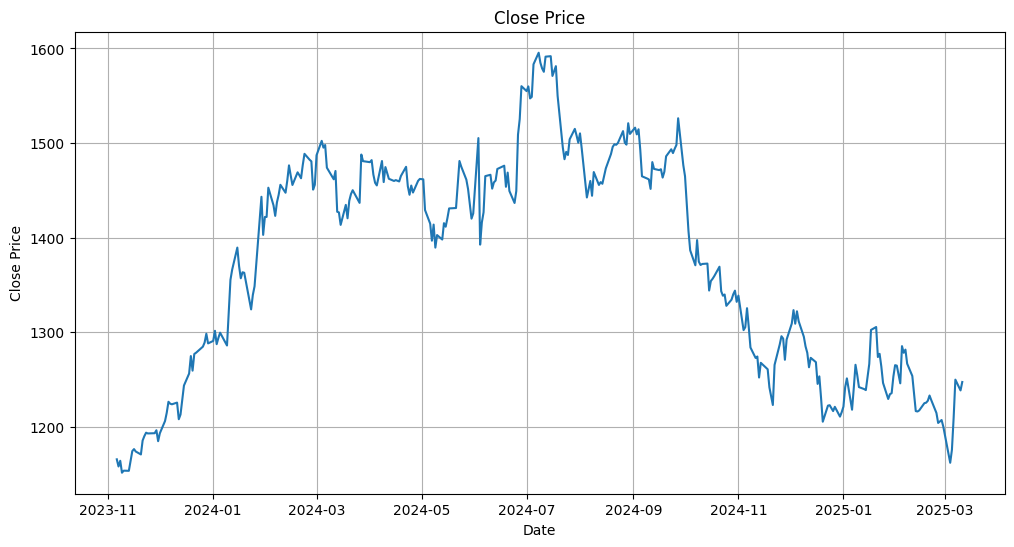

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Data Preprocessing
data = pd.read_csv('New file.csv')
X = data[['Open', 'High', 'Low', 'Close']]
y = data['Close']

print(X.shape)
print(y.shape)
X.tail()

(1620, 4)
(1620,)


,Open,High,Low,Close
1615,28.00,29.200001,28.000000,28.850000
1616,29.60,32.000000,29.000000,30.600000
1617,31.00,31.600000,29.700001,29.850000
1618,30.35,30.750000,30.000000,30.400000
1619,30.60,31.700001,29.600000,29.799999


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save the dates before splitting




'''X_train=X_scaled[:-5]
y_train=X_scaled[-5:]
X_test=X_scaled[-5:]
y_test=X_scaled[-5:]
'''
X_train, X_test, y_train, y_test,  = train_test_split(
    X_scaled, y,  test_size=0.1, shuffle=False
)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test)
type(X_test)

(1458, 4)
(1458,)
(162, 4)
(162,)
[[0.06527763 0.050351   0.08860116 0.06656373]
 [0.06392332 0.05197087 0.09072652 0.06778883]
 [0.06744453 0.06857455 0.09311756 0.08507635]
 [0.08017502 0.08072358 0.1071981  0.09596612]
 [0.09751016 0.09125274 0.11848911 0.09705509]
 [0.09425982 0.08288341 0.11569957 0.09542163]
 [0.09263465 0.08031861 0.11105033 0.08752654]
 [0.08572769 0.08504323 0.10653393 0.09800795]
 [0.10346912 0.09084778 0.12885026 0.1050863 ]
 [0.10116679 0.10016204 0.12606071 0.11434261]
 [0.11403271 0.09894713 0.13376517 0.1106673 ]
 [0.10590686 0.15091799 0.13084279 0.14769253]
 [0.14626524 0.13242446 0.15767552 0.13734724]
 [0.11633504 0.13093959 0.13549203 0.13612215]
 [0.14436922 0.13282944 0.16352027 0.14197541]
 [0.13962914 0.13053462 0.16445013 0.14306437]
 [0.13813939 0.12554002 0.16033223 0.13693887]
 [0.1324513  0.13363938 0.15581584 0.14374498]
 [0.14355662 0.13701411 0.16870086 0.15477088]
 [0.15547454 0.14173874 0.1632546  0.14170315]
 [0.14044171 0.1295897  0.

numpy.ndarray

In [ ]:
# Step 2: Stacked Autoencoder (SAE)
input_dim = X_train.shape[1]
print(input_dim)
encoding_dim = 64

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=False, validation_data=(X_test, X_test))

encoder = models.Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)
type( X_train_encoded)



4
Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0844 - val_loss: 0.4111
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1652 - val_loss: 0.2441
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0930 - val_loss: 0.2614
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1003 - val_loss: 0.2357
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0900 - val_loss: 0.2238
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0855 - val_loss: 0.2079
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - val_loss: 0.1932
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0738 - val_loss: 0.1780
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - val_loss: 0.1627
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0622 - val_loss: 0.1475
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0564 - val_loss: 0.1324
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

numpy.ndarray

In [ ]:
print(X_test_encoded.shape)

(26, 32)


In [ ]:
# Step 3: Kernel Extreme Learning Machine (KELM)
def polynomial_kernel(X, Y, degree=3, coef0=1):
    return (np.dot(X, Y.T) + coef0) ** degree

def rbf_kernel(X, Y, gamma=0.1):
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2) ** 2)

def sigmoid_kernel(X, Y, coef0=1, gamma=0.1):
    return np.tanh(gamma * np.dot(X, Y.T) + coef0)

class KELM:
    def __init__(self, kernel='rbf', C=1.0, degree=3, gamma=None, coef0=1):
        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.kernel = kernel
        self.alpha_ = None

    def _compute_kernel(self, X, Y):
        if self.kernel == 'polynomial':
            return polynomial_kernel(X, Y, self.degree, self.coef0)
        elif self.kernel == 'rbf':
            return rbf_kernel(X, Y, self.gamma)
        elif self.kernel == 'sigmoid':
            return sigmoid_kernel(X, Y, self.coef0, self.gamma)
        else:
            raise ValueError("Unsupported kernel type")

    def fit(self, X, y):
        y=np.array(y,dtype=float)

        K = self._compute_kernel(X, X)
        N = K.shape[0]
        I = np.identity(N)
        self.alpha_ = np.linalg.inv(I / self.C + K).dot(y)
        self.X_train_ = X

    def predict(self, X):
        K_test = self._compute_kernel(X, self.X_train_)
        return K_test.dot(self.alpha_)

In [ ]:
kelm = KELM(kernel='polynomial', C=1.0, gamma=0.1)
kelm.fit(X_train_encoded, y_train)
y_pred = kelm.predict(X_test_encoded)

In [ ]:
# Step 4: Evaluation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true=y_true.astype(float)
    y_pred=y_pred.astype(float)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)


print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

MAPE: inf%
MAE: 0.0245
RMSE: 0.0382
R-squared: -3.9655


<ipython-input-16-251b6b889917>:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


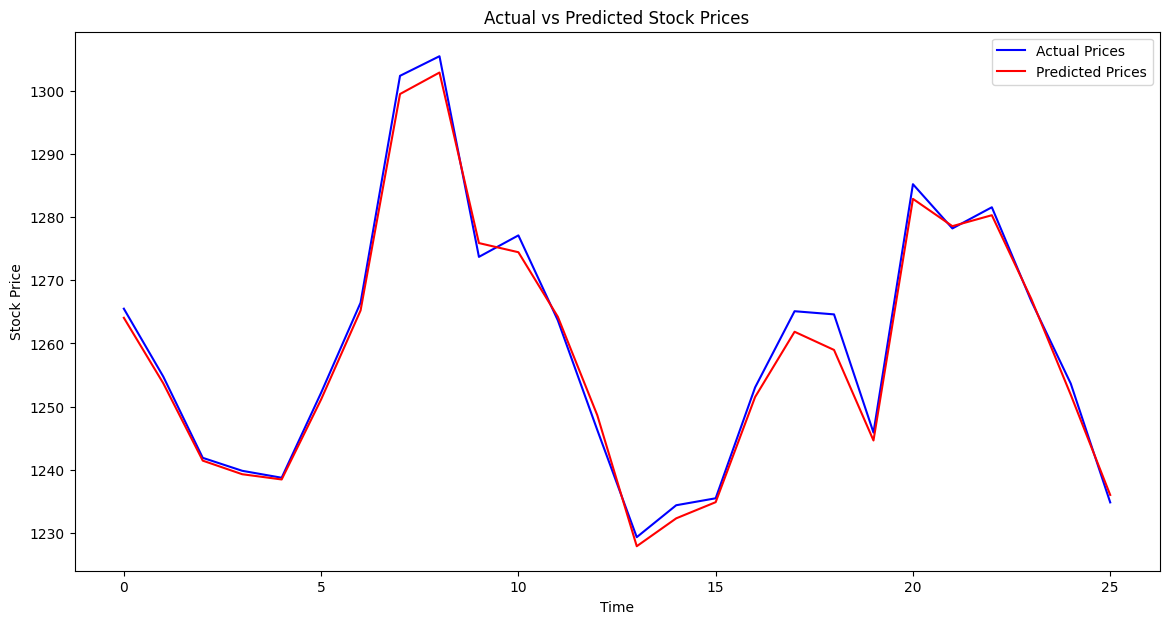

In [ ]:
# Step 5: Visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


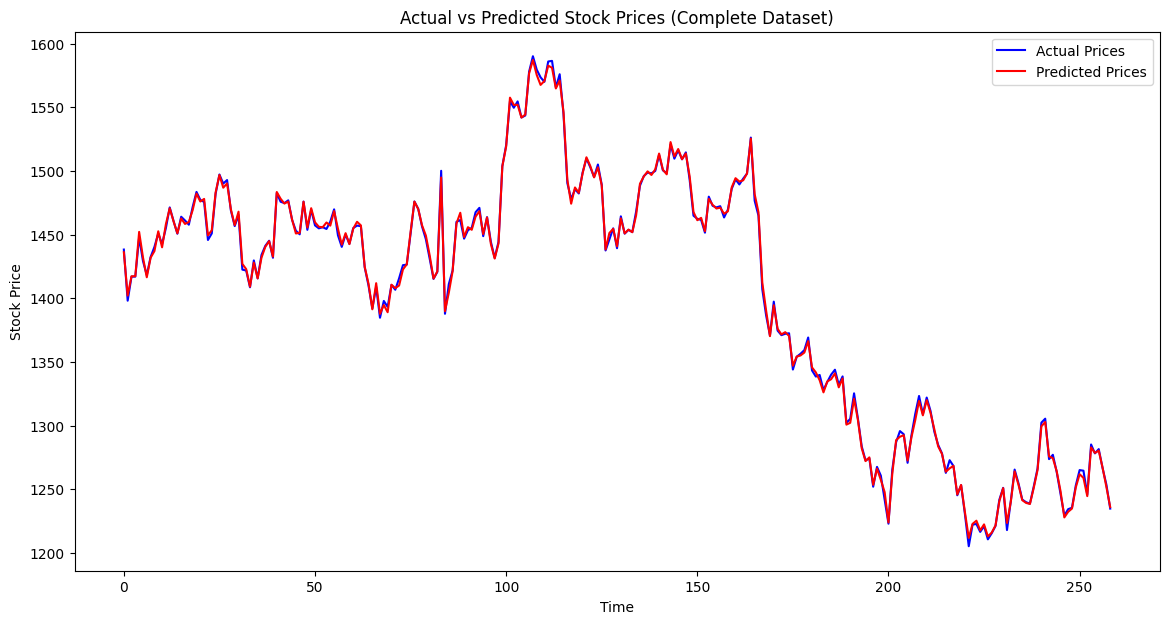

In [ ]:
import matplotlib.pyplot as plt
# Get predictions for the entire dataset
X_scaled_all = scaler.transform(X)
X_encoded_all = encoder.predict(X_scaled_all)
y_pred_all = kelm.predict(X_encoded_all)

# Plot the actual and predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(y.values, label='Actual Prices', color='blue')
plt.plot(y_pred_all, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices (Complete Dataset)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:

# Function to generate Buy/Sell signals
def get_buy_sell_signals(actual_prices, predicted_prices):
    signals = []
    for i in range(len(actual_prices)):
        if predicted_prices[i] > actual_prices[i]:
            signals.append(f"Buy {predicted_prices[i]} {actual_prices[i]}")
        elif predicted_prices[i] < actual_prices[i]:
            signals.append(f"Sell {predicted_prices[i]} {actual_prices[i]}")

    return signals

# Generate the Buy/Sell signals using actual and predicted prices
signals = get_buy_sell_signals(y_test.values, y_pred)
print(len(signals))
for i in range(len(signals)):
    print(signals[i])
print(signals[:162])  # Show the first 10 Buy/Sell signals


26
Sell 1264.0609985934582 1265.5
Sell 1253.689099924199 1254.75
Sell 1241.4567487028978 1241.9000244140625
Sell 1239.3070531105768 1239.8499755859375
Sell 1238.4784568087725 1238.75
Sell 1251.1403248629115 1252.199951171875
Sell 1265.2196919260716 1266.449951171875
Sell 1299.4698824889322 1302.3499755859375
Sell 1302.8699909429047 1305.449951171875
Buy 1275.882720825085 1273.699951171875
Sell 1274.4356208002578 1277.0999755859375
Buy 1264.2173498334755 1263.6500244140625
Buy 1248.63760690401 1246.300048828125
Sell 1227.9150781799556 1229.3499755859375
Sell 1232.3270243083105 1234.4000244140625
Sell 1234.8845997504793 1235.5
Sell 1251.5296528411895 1253.050048828125
Sell 1261.8498967121911 1265.0999755859375
Sell 1258.9758033497546 1264.5999755859375
Sell 1244.6481901477405 1245.9000244140625
Sell 1282.8780436851207 1285.199951171875
Buy 1278.5588796580103 1278.199951171875
Sell 1280.2913659878404 1281.550048828125
Buy 1267.0498577873561 1266.699951171875
Sell 1251.88058051194 1253.650

In [ ]:
print(y_test.values.shape)
print(y_pred.shape)

(162,)
(162,)


In [ ]:
# Function to compute strategy returns
def compute_strategy_returns(actual_prices, predicted_prices, Bc, Sc):
    returns = 0
    for t in range(len(actual_prices) - 1):
        if predicted_prices[t + 1] > actual_prices[t]:  # Buy signal
            returns += (predicted_prices[t + 1] - actual_prices[t] + (actual_prices[t] * Bc + predicted_prices[t + 1] * Sc)) / actual_prices[t]
        else:  # Sell signal
            returns += (actual_prices[t] - predicted_prices[t + 1] + (predicted_prices[t + 1] * Bc + actual_prices[t] * Sc)) / actual_prices[t]
    return 100 * returns

# Compute strategy returns
strategy_returns = compute_strategy_returns(y_test.values, y_pred, Bc=0.001, Sc=0.001)
print("Strategy Returns:", strategy_returns)

Strategy Returns: 33.40677137469909


[*********************100%***********************]  1 of 1 completed


     Unnamed: 0       Price       Close        High         Low        Open  \
532         534  2025-03-27  673.549988  676.750000  640.500000  655.299988   
533         535  2025-03-28  649.849976  673.950012  643.500000  672.000000   
534         536  2025-04-01  682.700012  689.799988  646.849976  649.000000   
535         537  2025-04-02  702.450012  708.400024  675.000000  682.700012   
536         538  2025-04-03  709.400024  714.700012  693.500000  694.950012   

       Volume  
532  21589495  
533   8807815  
534  14019630  
535  14993840  
536   6972769  
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0482 - val_loss: 0.1213
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - val_loss: 0.1548
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 - val_loss: 0.1708
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - val_loss: 0.1749
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - val_loss: 0.1740
Epoch 6/

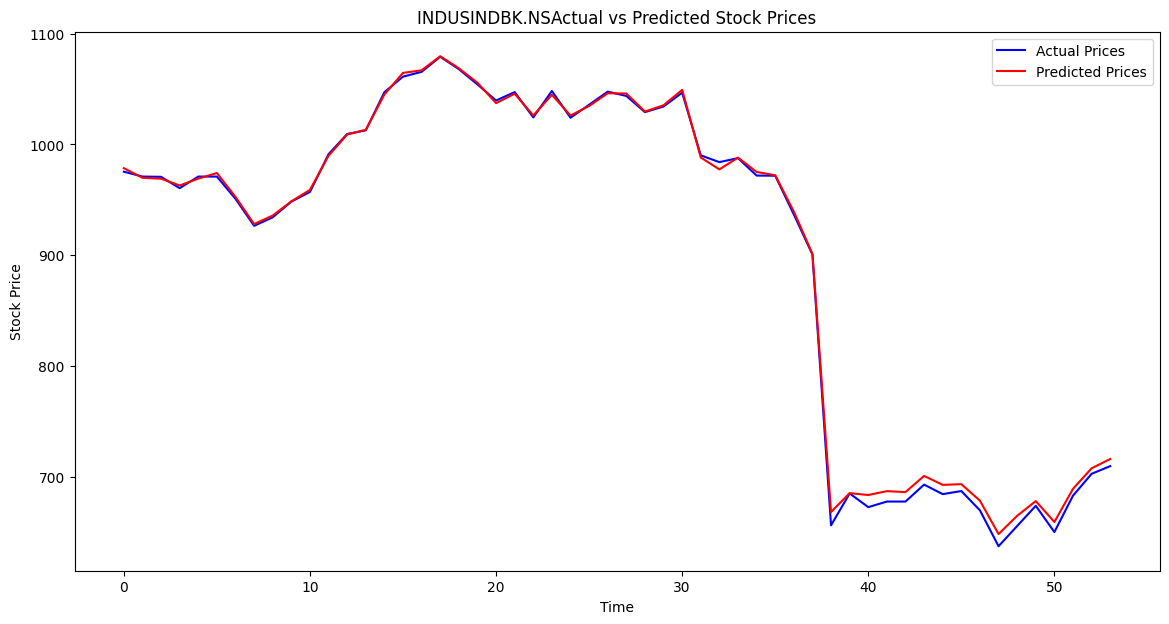

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


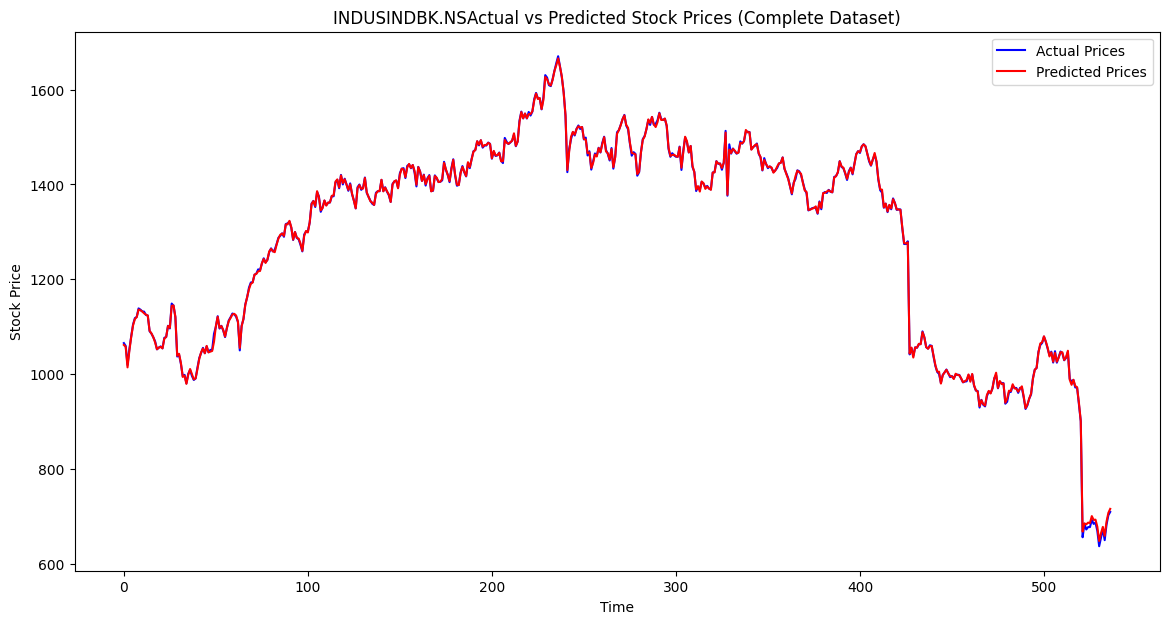

54
Buy 978.5330481618366 975.3499755859376
Sell 969.8206282039027 970.9500122070312
Sell 969.0341739080977 970.7000122070312
Buy 962.8944351536411 960.4500122070312
Sell 969.0851444586369 970.9500122070312
Buy 974.1726839122348 970.9500122070312
Buy 952.5233802141593 950.7999877929688
Buy 928.0270510609771 926.4500122070312
Buy 935.7623073078648 934.1500244140624
Buy 948.5571219094636 948.2999877929688
Buy 958.9244639871395 957.0499877929688
Sell 989.7720389355891 991.2000122070312
Sell 1008.9460313503732 1009.4000244140624
Buy 1013.1918763171634 1012.7000122070312
Sell 1045.0998877909296 1047.1500244140625
Buy 1064.5780865375345 1061.199951171875
Buy 1066.950449007083 1065.550048828125
Buy 1079.6464535804334 1079.0999755859375
Buy 1068.7634315955438 1068.0
Buy 1055.6906834854235 1054.1500244140625
Sell 1037.2627771370753 1039.6500244140625
Sell 1045.7762905391937 1047.25
Buy 1026.1338689903641 1024.4000244140625
Sell 1044.8002632933058 1048.25
Buy 1026.0903174073173 1024.0999755859375

'\nfrom numpy.polynomial.polynomial import Polynomial\nlast_X_test = X_test[-20:]\ndays = np.arange(20)\nX_forecast = np.zeros_like(last_X_test[0])\nfor feature in range(4):  # Iterate over Open, High, Low, Close\n    poly = Polynomial.fit(days, last_X_test[:, feature], 2)\n    X_forecast[feature] = poly(20)  # Predict the next day\'s value\n#print("X_forecast:", X_forecast)\n# Convert X_forecast to a NumPy array\nX_forecast = np.array(X_forecast)\nX_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))\ny_forecast = kelm.predict(X_forecast_encoded)\nprint(f"{Date_Pred} Predicted Closing Price for the next day:", y_forecast)\n'

In [6]:


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

'''State Bank of India (SBI) - SBIN.NS
Bank of India (BOI) - BANKINDIA.NS
Yes Bank - YESBANK.NS
Reliance Industries - RELIANCE.NS
Tata Consultancy Services (TCS) - TCS.NS
HDFC Bank - HDFCBANK.NS
Infosys - INFY.NS
ICICI Bank - ICICIBANK.NS
Larsen & Toubro - LT.NS
Adani Enterprises - ADANIENT.NS'''
# Define the ticker symbol for share you want to predict
ticker = "INDUSINDBK.NS"  # This is the ticker on the NSE
Date_Pred = "2025-04-04"
# Fetch historical data for the past 1 years
data = yf.download(ticker, start="2023-01-28", end=Date_Pred )

# Display the first few rows of the data
#print(data.head())
#print(data.tail())
data.to_csv('yahoo_data.csv')
df=pd.read_csv('yahoo_data.csv')
df = df.drop([0,1])
df.to_csv('New file.csv')

data=pd.read_csv('New file.csv')
#print(data.head())
print(data.tail())

#plt.figure(figsize=(12, 6))
#plt.plot(data['Close'])
#plt.title('Close Price')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.grid(True)
#plt.show()


# Step 1: Data Preprocessing
data = pd.read_csv('New file.csv')
X = data[['Open', 'High', 'Low', 'Close']]
y = data['Close']

#print(X.shape)
#print(y.shape)
X.tail()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save the dates before splitting

X_train, X_test, y_train, y_test,  = train_test_split(
    X_scaled, y,  test_size=0.1, shuffle=False
)

'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test)
type(X_test)'''
# Step 2: Stacked Autoencoder (SAE)
input_dim = X_train.shape[1]
#print(input_dim)
encoding_dim = 64

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=False, validation_data=(X_test, X_test))

encoder = models.Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)



#print(X_test_encoded.shape)
# Step 3: Kernel Extreme Learning Machine (KELM)
def polynomial_kernel(X, Y, degree=3, coef0=1):
    return (np.dot(X, Y.T) + coef0) ** degree

def rbf_kernel(X, Y, gamma=0.1):
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2) ** 2)

def sigmoid_kernel(X, Y, coef0=1, gamma=0.1):
    return np.tanh(gamma * np.dot(X, Y.T) + coef0)

class KELM:
    def __init__(self, kernel='rbf', C=1.0, degree=3, gamma=None, coef0=1):
        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.kernel = kernel
        self.alpha_ = None

    def _compute_kernel(self, X, Y):
        if self.kernel == 'polynomial':
            return polynomial_kernel(X, Y, self.degree, self.coef0)
        elif self.kernel == 'rbf':
            return rbf_kernel(X, Y, self.gamma)
        elif self.kernel == 'sigmoid':
            return sigmoid_kernel(X, Y, self.coef0, self.gamma)
        else:
            raise ValueError("Unsupported kernel type")

    def fit(self, X, y):
        y=np.array(y,dtype=float)

        K = self._compute_kernel(X, X)
        N = K.shape[0]
        I = np.identity(N)
        self.alpha_ = np.linalg.inv(I / self.C + K).dot(y)
        self.X_train_ = X

    def predict(self, X):
        K_test = self._compute_kernel(X, self.X_train_)
        return K_test.dot(self.alpha_)
kelm = KELM(kernel='polynomial', C=1.0, gamma=0.1)
kelm.fit(X_train_encoded, y_train)
y_pred = kelm.predict(X_test_encoded)
# Step 4: Evaluation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true=y_true.astype(float)
    y_pred=y_pred.astype(float)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)


print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")
# Step 5: Visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title(f'{ticker}Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#
# Get predictions for the entire dataset
X_scaled_all = scaler.transform(X)
X_encoded_all = encoder.predict(X_scaled_all)
y_pred_all = kelm.predict(X_encoded_all)

# Plot the actual and predicted values for the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(y.values, label='Actual Prices', color='blue')
plt.plot(y_pred_all, label='Predicted Prices', color='red')
plt.title(f'{ticker}Actual vs Predicted Stock Prices (Complete Dataset)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Function to generate Buy/Sell signals
def get_buy_sell_signals(actual_prices, predicted_prices):
    signals = []
    for i in range(len(actual_prices)):
        if predicted_prices[i] > actual_prices[i]:
            signals.append(f"Buy {predicted_prices[i]} {actual_prices[i]}")
        elif predicted_prices[i] < actual_prices[i]:
            signals.append(f"Sell {predicted_prices[i]} {actual_prices[i]}")

    return signals




# Generate the Buy/Sell signals using actual and predicted prices
signals = get_buy_sell_signals(y_test.values, y_pred)
print(len(signals))
for i in range(len(signals)):
    print(signals[i])
print(signals[:162])  # Show the first 10 Buy/Sell signals'''

# Function to compute strategy returns
def compute_strategy_returns(actual_prices, predicted_prices, Bc, Sc):
    returns = 0
    for t in range(len(actual_prices) - 1):
        if predicted_prices[t + 1] > actual_prices[t]:  # Buy signal
            returns += (predicted_prices[t + 1] - actual_prices[t] + (actual_prices[t] * Bc + predicted_prices[t + 1] * Sc)) / actual_prices[t]
        else:  # Sell signal
            returns += (actual_prices[t] - predicted_prices[t + 1] + (predicted_prices[t + 1] * Bc + actual_prices[t] * Sc)) / actual_prices[t]
    return 100 * returns


# Function to generate Buy/Sell signals
def get_buy_sell_signals(actual_prices, predicted_prices):
    signals = []
    for i in range(len(actual_prices)):
        if predicted_prices[i] > actual_prices[i]:
            signals.append(f"Buy {predicted_prices[i]} {actual_prices[i]}")
        elif predicted_prices[i] < actual_prices[i]:
            signals.append(f"Sell {predicted_prices[i]} {actual_prices[i]}")

    return signals


# Compute strategy returns
strategy_returns = compute_strategy_returns(y_test.values, y_pred, Bc=0.001, Sc=0.001)
print("Strategy Returns:", strategy_returns)

# Extract the last 20 days of X_test
last_X_test = X_test[-20:]
#print(last_X_test)
# Compute the average change per day for each feature
avg_change = np.mean(np.diff(last_X_test, axis=0), axis=0)

# Construct X_forecast based on the last row of X_test and projected change
X_forecast = last_X_test[-1] + avg_change

print("X_forecast:", X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print(f"{Date_Pred} Predicted Closing Price for the next day:", y_forecast)
#print(X_forecast)
'''
from numpy.polynomial.polynomial import Polynomial
last_X_test = X_test[-20:]
days = np.arange(20)
X_forecast = np.zeros_like(last_X_test[0])
for feature in range(4):  # Iterate over Open, High, Low, Close
    poly = Polynomial.fit(days, last_X_test[:, feature], 2)
    X_forecast[feature] = poly(20)  # Predict the next day's value
#print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print(f"{Date_Pred} Predicted Closing Price for the next day:", y_forecast)
'''

In [98]:
Date_Pred = "2025-04-04"

In [11]:
'''

Company : INDUSINDBK.NS
2025-02-28                       actual - 990.09
2025-03-03 predicted - 988.54  and actual - 984.0	   Signal : Sell
2025-03-04 predicted - 977.68  and actual - 987.59 Signal : Sell
2025-03-05 predicted - 985.08  and actual - 971.84  Signal : Sell
2025-03-06 predicted - 969.16  and actual - 971.70 Signal : Sell
2025-03-07 predicted - 966.98  and actual -  936.75 Signal : Sell
2025-03-10 predicted -931.95  and actual -  900.5	 Signal : Sell
2025-03-11 predicted - 891.36 and actual - 655.95  Signal :  Sell
2025-03-12 predicted - 653.75  and actual - 684.70 Signal : Sell (Wrong)
2025-03-13 predicted - 688.34  and actual - 672.34 Signal : Buy (Wrong)
2025-03-17 predicted - 635.46  and actual - 677.40 Signal : Sell (Wrong)
2025-03-18 predicted - 676.35  and actual - 677.40 Signal : Sell (Wrong)
2025-03-19 predicted - 673.99  and actual - 692.70 Signal : Sell (Wrong)
2025-03-20 predicted - 674.74  and actual - 684.09 Signal : Sell
2025-03-21 predicted - 681.25  and actual - 686 Signal : Sell (Wrong)
2025-03-24 predicted - 673.69  and actual - 669 Signal : Sell
2025-03-25 predicted - 663.48  and actual - 637 Signal : Sell
2025-03-26 predicted - 637.11  and actual - 655 Signal : Sell
2025-03-27 predicted - 648.00  and actual - 673 Signal : Sell (Wrong)
2025-03-28 predicted - 665.98  and actual - 649 Signal : Sell
2025-04-01 predicted - 647.78  and actual - 682 Signal : Sell (Wrong)
2025-04-02 predicted - 700.15  and actual - 702 Signal : Buy
2025-04-03 predicted - 694.89  and actual - 709 Signal : Sell (Wrong)
2025-04-04 predicted - 704.27  and actual - 682 Signal : Sell

MAPE: 0.47%
MAE: 3.5557
RMSE: 4.8315
R-squared: 0.9990

Company : RELIANCE.NS
2025-02-28                       actual - 1200
2025-03-03 predicted - 1198  and actual - 1171.25   Signal :  Sell
2025-03-04 predicted - 1166  and actual -1161 Signal : Sell
2025-03-05 predicted - 1157  and actual - 1175  Signal : Sell (Wrong)
2025-03-06 predicted - 1170  and actual - 1209 Signal :  Sell (Wrong)
2025-03-07 predicted - 1204  and actual - 1249  Signal : Sell (Wrong)
2025-03-10 predicted - 1248 and actual - 1238 Signal : Sell
2025-03-11 predicted - 1239 and actual - 1247 Signal : Buy
2025-03-12 predicted - 1246 and actual - 1257 Signal :Sell (WRONG)
2025-03-13 predicted - 1257  and actual - 1247  Signal : Sell
2025-03-17 predicted - 1249.69  and actual - 1238  Signal : Sell (WRONG)
2025-03-18 predicted - 1241.10  and actual - 1238 Signal : BUY
2025-03-19 predicted - 1239.46  and actual - 1247 Signal : BUY
2025-03-20 predicted - 1248.26  and actual - 1269 Signal : BUY
2025-03-21 predicted - 1270.99  and actual - 1276 Signal : BUY
2025-03-24 predicted - 1278.20  and actual - 1302 Signal : BUY
2025-03-25 predicted - 1304.76  and actual - 1285 Signal : BUY (WRONG)
2025-03-26 predicted - 1289.58  and actual - 1273 Signal : BUY (WRONG)
2025-03-27 predicted - 1276.74  and actual - 1278 Signal : BUY
2025-03-28 predicted - 1281.55  and actual - 1275 Signal : Sell (WRONG)
2025-04-01 predicted - 1280.17  and actual - 1252 Signal : BUY (WRONG)
2025-04-02 predicted - 1258.80  and actual - 1251 Signal : BUY (WRONG)
2025-04-03 predicted - 1255.49  and actual - 1248 Signal : BUY (WRONG)
2025-04-14 predicted - 1252.27 and actual - 1204 Signal : Sell

MAPE: 0.06%
MAE: 0.7003
RMSE: 0.8327
R-squared: 0.9993

Company : TATAMOTORS.NS
2025-02-28                       actual - 620.65
2025-03-03 predicted - 617.92   and actual -621.15    Signal :  Sell
2025-03-04 predicted - 615.92  and actual - 619.20 Signal : Sell
2025-03-05 predicted - 615.59  and actual - 640.79  Signal : Sell(Wrong)
2025-03-06 predicted - 634.82  and actual - 639.65 Signal :  Sell
2025-03-07 predicted - 637.06  and actual - 648.29  Signal : Sell(Wrong)
2025-03-10 predicted - 643.69 and actual - 648.15 Signal : Sell
2025-03-11 predicted - 645.60 and actual - 648.04 Signal :  Sell
2025-03-12 predicted - 645.83 and actual - 668 Signal : Buy
2025-03-13 predicted - 666.18  and actual - 655 Signal : Sell
2025-03-17 predicted - 654.24 and actual - 661 Signal : Sell
2025-03-18 predicted - 659.73  and actual - 661 Signal : Sell
2025-03-19 predicted - 659.55 and actual - 682 Signal : Sell
2025-03-20 predicted - 681.42  and actual - 690 Signal : Sell
2025-03-21 predicted - 688.93 and actual - 702 Signal : Sell
2025-03-24 predicted - 702.24  and actual - 713 Signal : Sell
2025-03-25 predicted - 714.48  and actual - 710 Signal : Sell
2025-03-26 predicted - 712.81  and actual - 708 Signal : Sell
2025-03-27 predicted - 711.78  and actual - 668 Signal : Sell
2025-03-28 predicted - 669.47 and actual - 674 Signal : Sell
2025-04-01 predicted - 677.66  and actual - 671 Signal : Sell
2025-04-02 predicted - 675.27  and actual - 671 Signal : Sell
2025-04-03 predicted - 673.13 and actual - 653 Signal : Sell
2025-04-04 predicted - 656.40  and actual - 613 Signal : Sell

MAPE: 0.15%
MAE: 1.0281
RMSE: 1.2217
R-squared: 0.9990

Company : YESBANK.NS
2025-02-28                       actual - 16.75
2025-03-03 predicted -16.62   and actual - 16.30   Signal :  Sell
2025-03-04 predicted - 16.19  and actual - 16.34  Signal : Sell (Wrong)
2025-03-05 predicted - 16.22  and actual - 16.92  Signal : Sell (Wrong)
2025-03-06 predicted - 16.76  and actual - 16.97 Signal :  Sell(Wrong)
2025-03-07 predicted - 16.85  and actual - 16.87  Signal : Sell
2025-03-10 predicted - 16.76 and actual - 16.52 Signal : Sell
2025-03-11 predicted - 16.41 and actual - 16.37 Signal :  Sell
2025-03-12 predicted - 16.25  and actual - *** Signal : Sell
2025-03-13 predicted -   and actual - Signal : Sell
2025-03-17 predicted -   and actual - Signal : Sell
2025-03-18 predicted -   and actual - Signal : Sell
2025-03-19 predicted -   and actual - Signal : Sell
2025-03-20 predicted -   and actual - Signal : Sell
2025-03-21 predicted -   and actual - Signal : Sell
2025-03-24 predicted -   and actual - Signal : Sell
2025-03-25 predicted -   and actual - Signal : Sell
2025-03-26 predicted -   and actual - Signal : Sell
2025-03-27 predicted -   and actual - Signal : Sell
2025-03-28 predicted -   and actual - Signal : Sell
2025-04-01 predicted -   and actual - Signal : Sell
2025-04-02 predicted -   and actual - Signal : Sell
2025-04-03 predicted -   and actual - Signal : Sell
2025-04-14 predicted -   and actual - Signal : Sell


Company : HDFC.NS
2025-02-28                       actual - 1732.40
2025-03-03 predicted - 1732.33  and actual - 1701.55   Signal : Sell
2025-03-04 predicted - 1703.71  and actual - 1710.0	 Signal : Buy
2025-03-05 predicted -  1709 and actual - 1690.0   Signal : Sell
2025-03-06 predicted - 1688  and actual - 1691.19 Signal :  Sell (Wrong)
2025-03-07 predicted -1687   and actual - 1689.25  Signal : Sell
2025-03-10 predicted - 1687.32 and actual - 1687.5 Signal : Sell
2025-03-11 predicted - 1686  and actual - 1685.5	 Signal :   Sell
2025-03-12 predicted - 1684.40 and actual - *** Signal : Sell
2025-03-13 predicted -   and actual - Signal : Sell
2025-03-17 predicted -   and actual - Signal : Sell
2025-03-18 predicted -   and actual - Signal : Sell
2025-03-19 predicted -   and actual - Signal : Sell
2025-03-20 predicted -   and actual - Signal : Sell
2025-03-21 predicted -   and actual - Signal : Sell
2025-03-24 predicted -   and actual - Signal : Sell
2025-03-25 predicted -   and actual - Signal : Sell
2025-03-26 predicted -   and actual - Signal : Sell
2025-03-27 predicted -   and actual - Signal : Sell
2025-03-28 predicted -   and actual - Signal : Sell
2025-04-01 predicted -   and actual - Signal : Sell
2025-04-02 predicted -   and actual - Signal : Sell
2025-04-03 predicted -   and actual - Signal : Sell
2025-04-14 predicted -   and actual - Signal : Sell




Company : SUZLON.NS
2025-02-28                       actual - 49.70
2025-03-03 predicted - 49.57  and actual - 49.77   Signal :  Sell (wrong)
2025-03-04 predicted - 49.12  and actual - 50.11 Signal : Sell (wrong)
2025-03-05 predicted - 49.89  and actual - 51.49  Signal : Sell (Wrong)
2025-03-06 predicted - 51.28  and actual - 52.09 Signal :  Sell(Wrong)
2025-03-07 predicted - 51.99  and actual - 54.91 Signal : Sell(Wrong)
2025-03-10 predicted - 55.21 and actual - 53.24  Signal : Buy(Wrong)
2025-03-11 predicted - 53.79  and actual - 53.75  Signal :  Buy
2025-03-12 predicted - 53.78  and actual - *** Signal : Buy
2025-03-13 predicted -   and actual - Signal : Sell
2025-03-17 predicted -   and actual - Signal : Sell
2025-03-18 predicted -   and actual - Signal : Sell
2025-03-19 predicted -   and actual - Signal : Sell
2025-03-20 predicted -   and actual - Signal : Sell
2025-03-21 predicted -   and actual - Signal : Sell
2025-03-24 predicted -   and actual - Signal : Sell
2025-03-25 predicted -   and actual - Signal : Sell
2025-03-26 predicted -   and actual - Signal : Sell
2025-03-27 predicted -   and actual - Signal : Sell
2025-03-28 predicted -   and actual - Signal : Sell
2025-04-01 predicted -   and actual - Signal : Sell
2025-04-02 predicted -   and actual - Signal : Sell
2025-04-03 predicted -   and actual - Signal : Sell
2025-04-14 predicted -   and actual - Signal : Sell



'''

'\n\nCompany : INDUSINDBK.NS\n2025-02-28                       actual - 990.09\n2025-03-03 predicted - 988.54  and actual - 984.0\t   Signal : Sell\n2025-03-04 predicted - 977.68  and actual - 987.59 Signal : Sell\n2025-03-05 predicted - 985.08  and actual - 971.84  Signal : Sell\n2025-03-06 predicted - 969.16  and actual - 971.70 Signal : Sell\n2025-03-07 predicted - 966.98  and actual -  936.75 Signal : Sell\n2025-03-10 predicted -931.95  and actual - 900.5\t Signal : Sell\n2025-03-11 predicted - 891.36 and actual -655.95  Signal :  Sell\n2025-03-12 predicted - 653.75  and actual - *** Signal : Sell\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n2025-03-13\n\n\n\n\n\n\n\n\nCompany : TATAMOTORS.NS\n2025-02-28                       actual - 620.65\n2025-03-03 predicted - 617.92   and actual -621.15    Signal :  Sell\n2025-03-04 predicted - 615.92  and actual - 619.20 Signal : Sell\n2025-03-05 predicted - 615.59  

In [10]:
data_True = yf.download(ticker, start="2025-02-28", end="2025-04-13" )
data_True.to_csv('yahoo_data_True.csv')
data_True=pd.read_csv('yahoo_data_True.csv')
data_True


[*********************100%***********************]  1 of 1 completed


,Price,Close,High,Low,Open,Volume
0,Ticker,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2025-02-28,990.0999755859375,1040.6500244140625,970.0999755859375,1040.0,55666745
3,2025-03-03,984.0,986.2999877929688,947.0,978.9500122070312,6158061
4,2025-03-04,987.5999755859375,1003.5999755859375,966.9500122070312,978.0,3271190
5,2025-03-05,971.8499755859375,995.25,970.6500244140625,984.25,3944062
6,2025-03-06,971.7000122070312,984.0999755859375,962.2000122070312,976.0,3928358
7,2025-03-07,936.75,976.5999755859375,932.2999877929688,971.0,7737031
8,2025-03-10,900.5,913.3499755859375,881.0999755859375,895.0,16014401
9,2025-03-11,655.9500122070312,810.4500122070312,649.0,810.4500122070312,101075220


In [2]:
from numpy.polynomial.polynomial import Polynomial
last_X_test = X_test[-20:]
days = np.arange(20)
X_forecast = np.zeros_like(last_X_test[0])
for feature in range(4):  # Iterate over Open, High, Low, Close
    poly = Polynomial.fit(days, last_X_test[:, feature], 2)
    X_forecast[feature] = poly(20)  # Predict the next day's value
print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [0.084737   0.05290549 0.03017017 0.02236453]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Price for the next day: [691.47421434]
[0.084737   0.05290549 0.03017017 0.02236453]


In [ ]:
last_X_test = X_test[-20:]
#print(last_X_test)
# Compute the average change per day for each feature
avg_change = np.mean(np.diff(last_X_test, axis=0), axis=0)

# Construct X_forecast based on the last row of X_test and projected change
X_forecast = last_X_test[-1] + avg_change

print("X_forecast:", X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [-0.02177749 -0.01970769 -0.02088905  0.00992592]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Price for the next day: [669.02381071]
[-0.02177749 -0.01970769 -0.02088905  0.00992592]


[*********************100%***********************]  1 of 1 completed


,Price,Close,High,Low,Open,Volume
0,Ticker,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS,INDUSINDBK.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2025-02-28,990.0999755859375,1040.6500244140625,970.0999755859375,1040.0,55666745
3,2025-03-03,984.0,986.2999877929688,947.0,978.9500122070312,6158061
4,2025-03-04,987.5999755859375,1003.5999755859375,966.9500122070312,978.0,3271190
5,2025-03-05,971.8499755859375,995.25,970.6500244140625,984.25,3944062
6,2025-03-06,971.7000122070312,984.0999755859375,962.2000122070312,976.0,3928358
7,2025-03-07,936.75,976.5999755859375,932.2999877929688,971.0,7737031
8,2025-03-10,900.5,913.3499755859375,881.0999755859375,895.0,16014401
9,2025-03-11,655.9500122070312,810.4500122070312,649.0,810.4500122070312,101075220


In [ ]:
'''

Company : INDUSINDBK.NS
2025-02-28                       actual - 990.09
2025-03-03 predicted - 988.54  and actual - 984.0	   Signal : Sell
2025-03-04 predicted - 977.68  and actual - 987.59 Signal : Sell
2025-03-05 predicted - 985.08  and actual - 971.84  Signal : Sell
2025-03-06 predicted - 969.16  and actual - 971.70 Signal : Sell
2025-03-07 predicted - 966.98  and actual -  936.75 Signal : Sell
2025-03-10 predicted -931.95  and actual - 900.5	 Signal : Sell
2025-03-11 predicted - 891.36 and actual -655.95  Signal :  Sell
2025-03-12 predicted - 653.75  and actual - *** Signal : Sell

Company : TATAMOTORS.NS
2025-02-28                       actual - 620.65
2025-03-03 predicted - 617.92   and actual -621.15    Signal :  Sell
2025-03-04 predicted - 615.92  and actual - 619.20 Signal : Sell
2025-03-05 predicted - 615.59  and actual - 640.79  Signal : Sell(Wrong)
2025-03-06 predicted - 634.82  and actual - 639.65 Signal :  Sell
2025-03-07 predicted - 637.06  and actual - 648.29  Signal : Sell(Wrong)
2025-03-10 predicted - 643.69 and actual - 648.15 Signal : Sell
2025-03-11 predicted - 645.60 and actual - 648.04 Signal :  Sell
2025-03-12 predicted - 645.83 and actual - *** Signal : Buy

Company : YESBANK.NS
2025-02-28                       actual - 16.75
2025-03-03 predicted -16.62   and actual - 16.30   Signal :  Sell
2025-03-04 predicted - 16.19  and actual - 16.34  Signal : Sell (Wrong)
2025-03-05 predicted - 16.22  and actual - 16.92  Signal : Sell (Wrong)
2025-03-06 predicted - 16.76  and actual - 16.97 Signal :  Sell(Wrong)
2025-03-07 predicted - 16.85  and actual - 16.87  Signal : Sell
2025-03-10 predicted - 16.76 and actual - 16.52 Signal : Sell
2025-03-11 predicted - 16.41 and actual - 16.37 Signal :  Sell
2025-03-12 predicted - 16.25  and actual - *** Signal : Sell


Company : HDFC.NS
2025-02-28                       actual - 1732.40
2025-03-03 predicted - 1732.33  and actual - 1701.55   Signal : Sell
2025-03-04 predicted - 1703.71  and actual - 1710.0	 Signal : Buy
2025-03-05 predicted -  1709 and actual - 1690.0   Signal : Sell
2025-03-06 predicted - 1688  and actual - 1691.19 Signal :  Sell (Wrong)
2025-03-07 predicted -1687   and actual - 1689.25  Signal : Sell
2025-03-10 predicted - 1687.32 and actual - 1687.5 Signal : Sell
2025-03-11 predicted - 1686  and actual - 1685.5	 Signal :   Sell
2025-03-12 predicted - 1684.40 and actual - *** Signal : Sell

Company : RELIANCE.NS
2025-02-28                       actual - 1200
2025-03-03 predicted - 1198  and actual - 1171.25   Signal :  Sell
2025-03-04 predicted - 1166  and actual -1161 Signal : Sell
2025-03-05 predicted - 1157  and actual - 1175  Signal : Sell (Wrong)
2025-03-06 predicted - 1170  and actual - 1209 Signal :  Sell (Wrong)
2025-03-07 predicted - 1204  and actual - 1249  Signal : Sell (Wrong)
2025-03-10 predicted - 1248 and actual - 1238 Signal : Sell
2025-03-11 predicted - 1239 and actual - 1247 Signal : Buy
2025-03-12 predicted - 1246 and actual - *** Signal :Sell


Company : SUZLON.NS
2025-02-28                       actual - 49.70
2025-03-03 predicted - 49.57  and actual - 49.77   Signal :  Sell (wrong)
2025-03-04 predicted - 49.12  and actual - 50.11 Signal : Sell (wrong)
2025-03-05 predicted - 49.89  and actual - 51.49  Signal : Sell (Wrong)
2025-03-06 predicted - 51.28  and actual - 52.09 Signal :  Sell(Wrong)
2025-03-07 predicted - 51.99  and actual - 54.91 Signal : Sell(Wrong)
2025-03-10 predicted - 55.21 and actual - 53.24  Signal : Buy(Wrong)
2025-03-11 predicted - 53.79  and actual - 53.75  Signal :  Buy
2025-03-12 predicted - 53.78  and actual - *** Signal : Buy



'''

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def fetch_data(ticker):
    data = yf.download(ticker, period='1y', interval='1d')
    return data[['Open', 'High', 'Low', 'Close']]

def preprocess_data(data):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25, activation='relu'),
        Dense(4)  # Output shape matching ['Open', 'High', 'Low', 'Close']
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def forecast_next_day(model, last_sequence, scaler):
    last_sequence = np.expand_dims(last_sequence, axis=0)
    predicted_normalized = model.predict(last_sequence)
    return predicted_normalized

# Fetch data
ticker = "INDUSINDBK.NS"
data = fetch_data(ticker)
data_scaled, scaler = preprocess_data(data)

# Create sequences
seq_length = 100
X, y = create_sequences(data_scaled, seq_length)

# Split data for training
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]

# Build and train model
model = build_lstm_model((seq_length, 4))
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Forecast next day's normalized values
last_sequence = data_scaled[-seq_length:]
predicted_normalized = forecast_next_day(model, last_sequence, scaler)
print("Predicted Min-Max Normalized Prices:", predicted_normalized)

X_forecast =  predicted_normalized

print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.2969
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0719
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0345
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0262
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0205
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0220
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0120
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0134
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0112
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0086
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0095
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0071
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0071
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0061
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0058
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [ ]:
X_forecast =  predicted_normalized

print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [[0.08075649 0.05033753 0.09957831 0.06110552]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Price for the next day: [732.67407867]
[[0.08075649 0.05033753 0.09957831 0.06110552]]


In [ ]:
!pip install keras-tuner
import yfinance as yf #Auto ML
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch

# Fetch stock data
def get_stock_data(symbol, start, end):
    data = yf.download(symbol, start=start, end=end)
    return data[['Open', 'High', 'Low', 'Close']]

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled, scaler

# Create sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])  # Predicting [Open, High, Low, Close]
    return np.array(X), np.array(y)

# Define model builder for AutoML
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True, input_shape=(60, 4)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50)))
    model.add(Dense(4))  # Predicting 4 values
    model.compile(optimizer='adam', loss='mse')
    return model

# Load data
symbol = "INDUSINDBK.NS"
start_date = (pd.Timestamp.today() - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
data = get_stock_data(symbol, start_date, end_date)

# Normalize data
data_scaled, scaler = preprocess_data(data)
X, y = create_sequences(data_scaled)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, shuffle=False)

# AutoML tuning
tuner = RandomSearch(build_model, objective='val_loss', max_trials=5, executions_per_trial=1, directory='tuner_results', project_name='lstm_tuning')
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Train the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred = best_model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean((y_test_actual - y_pred_actual) ** 2))
amse = np.mean(np.abs(y_test_actual - y_pred_actual))
print(f'RMSE: {rmse}, AMSE: {amse}')

# Predict next day's normalized [Open, High, Low, Close]
last_sequence = data_scaled[-60:].reshape(1, 60, 4)
next_day_pred = best_model.predict(last_sequence)
print(f'Predicted Next Day Normalized [Open, High, Low, Close]:\n{next_day_pred}')
X_forecast =  next_day_pred

print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

Trial 5 Complete [00h 00m 17s]
val_loss: 0.017489535734057426

Best val_loss So Far: 0.004578924737870693
Total elapsed time: 00h 01m 37s
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - loss: 0.2338 - val_loss: 0.0720
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0205 - val_loss: 0.0218
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.0136 - val_loss: 0.0403
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0107 - val_loss: 0.0228
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0100 - val_loss: 0.0158
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0077 - val_loss: 0.0182
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0071 - val_loss: 0.0103
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 0.0059 - val_loss: 0.0110
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 11/50
6/6 ━━━━━

In [ ]:


# Exponentially increasing weights
weights = np.exp(np.linspace(0.1, 1, 19))  # Exponential weight increase
weights /= np.sum(weights)  # Normalize weights

# Compute weighted average change
avg_change_weighted = np.average(np.diff(last_X_test, axis=0), axis=0, weights=weights)

# Apply the weighted change to the last known values
X_forecast = last_X_test[-1] + avg_change_weighted

print("X_forecast:", X_forecast)

# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)

print("Predicted Price for the next day:", y_forecast)
print("Refined X_forecast:", X_forecast)


X_forecast: [-0.02956697 -0.02663281 -0.0286767   0.00375492]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Price for the next day: [670.98201236]
Refined X_forecast: [-0.02956697 -0.02663281 -0.0286767   0.00375492]


In [ ]:
weights = np.linspace(1, 2, 19)  # Increasing weights
avg_change_weighted = np.average(np.diff(last_X_test, axis=0), axis=0, weights=weights)
X_forecast = last_X_test[-1] + avg_change_weighted

print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [-0.02698457 -0.02442016 -0.02628596  0.00558166]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Price for the next day: [672.66093242]
[-0.02698457 -0.02442016 -0.02628596  0.00558166]


In [ ]:
alpha = 0.3  # Smoothing factor
smoothed_values = np.zeros_like(last_X_test[0])
for i in range(1, last_X_test.shape[0]):
    smoothed_values = alpha * last_X_test[i] + (1 - alpha) * smoothed_values
X_forecast = smoothed_values
print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [0.19096513 0.16096242 0.16400607 0.15060234]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Price for the next day: [815.11073362]
[0.19096513 0.16096242 0.16400607 0.15060234]


In [ ]:
from numpy.polynomial.polynomial import Polynomial

days = np.arange(20)
X_forecast = np.zeros_like(last_X_test[0])
for feature in range(4):  # Iterate over Open, High, Low, Close
    poly = Polynomial.fit(days, last_X_test[:, feature], 2)
    X_forecast[feature] = poly(20)  # Predict the next day's value
print("X_forecast:", X_forecast)
# Convert X_forecast to a NumPy array
X_forecast = np.array(X_forecast)
X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
y_forecast = kelm.predict(X_forecast_encoded)
print("Predicted Price for the next day:", y_forecast)
print(X_forecast)

X_forecast: [0.084737   0.05290549 0.03017017 0.02236453]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Price for the next day: [693.66933141]
[0.084737   0.05290549 0.03017017 0.02236453]


In [100]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
from numpy.polynomial.polynomial import Polynomial

# Ask for input dates
start_date = input("Enter the start date (YYYY-MM-DD): ")
initial_end_date = input("Enter the initial end date (YYYY-MM-DD): ")

ticker = "INDUSINDBK.NS"
num_days_to_predict = 5
predictions = []

for i in range(num_days_to_predict):
    # Update end date for each iteration
    current_end = pd.to_datetime(initial_end_date) + pd.Timedelta(days=i)
    current_end_str = current_end.strftime('%Y-%m-%d')

    data = yf.download(ticker, start=start_date, end=current_end_str)
    if data.empty or len(data) < 50:
        print(f"Not enough data for date {current_end_str}")
        continue

    df = data.copy().reset_index(drop=True)
    X = df[['Open', 'High', 'Low', 'Close']]
    y = df['Close']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split (last 10% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.1, shuffle=False
    )

    # Autoencoder
    input_dim = X_train.shape[1]
    encoding_dim = 64

    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_layer)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = models.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=False, verbose=0)

    encoder = models.Model(input_layer, encoded)
    X_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)

    # KELM
    def polynomial_kernel(X, Y, degree=3, coef0=1):
        return (np.dot(X, Y.T) + coef0) ** degree

    class KELM:
        def __init__(self, kernel='polynomial', C=1.0, degree=3, gamma=0.1, coef0=1):
            self.C = C
            self.degree = degree
            self.coef0 = coef0
            self.kernel = kernel
            self.alpha_ = None

        def _compute_kernel(self, X, Y):
            return polynomial_kernel(X, Y, self.degree, self.coef0)

        def fit(self, X, y):
            y = np.array(y, dtype=float)
            K = self._compute_kernel(X, X)
            N = K.shape[0]
            I = np.identity(N)
            self.alpha_ = np.linalg.inv(I / self.C + K).dot(y)
            self.X_train_ = X

        def predict(self, X):
            K_test = self._compute_kernel(X, self.X_train_)
            return K_test.dot(self.alpha_)

    kelm = KELM(kernel='polynomial')
    kelm.fit(X_train_encoded, y_train)

    # Forecast next day
    last_X_test = X_test[-20:]
    days = np.arange(20)
    X_forecast = np.zeros_like(last_X_test[0])
    for feature in range(4):
        poly = Polynomial.fit(days, last_X_test[:, feature], 2)
        X_forecast[feature] = poly(20)

    X_forecast_encoded = encoder.predict(X_forecast.reshape(1, -1))
    y_forecast = kelm.predict(X_forecast_encoded)

    predictions.append((current_end_str, y_forecast[0]))

# Print all 5 predicted values
print("\nPredicted Closing Prices for the Next 5 Days:")
for date, price in predictions:
    print(f"{date}: {float(price):.2f}")


Enter the start date (YYYY-MM-DD): 2023-03-24
Enter the initial end date (YYYY-MM-DD): 2025-03-24


[*********************100%***********************]  1 of 1 completed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[*********************100%***********************]  1 of 1 completed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[*********************100%***********************]  1 of 1 completed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[*********************100%***********************]  1 of 1 completed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[*********************100%***********************]  1 of 1 completed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Predicted Closing Prices for the Next 5 Days:
2025-03-24: 604.64
2025-03-25: 623.42
2025-03-26: 624.14
2025-03-27: 643.00
2025-03-28: 678.54


<ipython-input-100-cd96d938eb8b>:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{date}: {float(price):.2f}")
